In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user_video = pd.read_csv("./KA_DATA/my_user_video.csv",header=None,sep= ' ')
groupMembe = pd.read_csv("./KA_DATA5/moocgroupMember_u_v.csv",header=None,sep =' ')

In [3]:
columns = ["user", "video"]
user_video.columns = columns
user_video.sort_values(by = "user")

,user,video
177797,1,664
185865,1,713
171618,1,635
206728,1,885
206781,1,886
...,...,...
78503,4721,235
92148,4722,313
102992,4722,421
91277,4722,312


In [4]:
list_user = [int(i) for i in user_video['user']]
list_video = [int(i) for i in user_video['video']]

In [5]:
#  查找元素在列表中的下标
def find_in_list(myList,value):
    try:
        pos=[]
        for v in range(0,len(myList)):
            if value==myList[v]:
                pos.append(v)
        return pos
    except:
        print("find_in_list() Exception!")

In [6]:
len(find_in_list(list_user, 976))

5

In [7]:
# Find out at least half or more of the items that the members have interacted with as group interaction items.
Group_Video = []
for groupid,u in zip(groupMembe[0], groupMembe[1]):
    G_user = [int(i) for i in u.split(',')] 
    U_videos=[]
    
    Group_videos = {}
    for user in G_user:
        u_video = set()
        index = find_in_list(list_user, user)
        for j in index:
            u_video.add(list_video[j])
        U_videos.append(u_video)
#     print(U_videos)    
    if len(U_videos)==4:
        group_video = set()
        for video in  U_videos[0]:
            if video in  U_videos[1]: 
                group_video.add(video)
        for video in  U_videos[0]:
             if video in  U_videos[2]: 
                group_video.add(video)
        for video in  U_videos[0]:
             if video in  U_videos[3]: 
                group_video.add(video)
        for video in  U_videos[1]:
             if video in  U_videos[2]: 
                group_video.add(video)
        for video in  U_videos[1]:
             if video in  U_videos[3]: 
                group_video.add(video)
        for video in  U_videos[2]:
             if video in  U_videos[3]:
                group_video.add(video)
    if len(U_videos)==3:
        group_video = set()
        for video in  U_videos[0]:
            if video in  U_videos[1]:
                group_video.add(video)
        for video in  U_videos[0]:
             if video in  U_videos[2] :
                group_video.add(video)
        for video in  U_videos[1]:
             if video in  U_videos[2] :
                group_video.add(video)
    if len(U_videos)==2:
        group_video = set()
        for video in  U_videos[0]:
            if video in  U_videos[1]:
                group_video.add(video)
#         for video in  U_videos[1]:
#             group_video.add(video)
    Group_videos[groupid]=group_video
    Group_Video.append(Group_videos)
# print(Group_Video)

[{0: set()}, {1: set()}, {2: {224, 417, 227, 228, 229, 230, 451, 232, 485, 522, 523, 175, 468, 216, 217, 603}}, {3: {449, 929, 1161, 1164, 1165, 921, 922, 923}}, {4: set()}, {5: set()}, {6: {1075}}, {7: set()}, {8: set()}, {9: set()}, {10: {0, 1, 227, 228, 229, 230, 112, 113, 209, 115, 116, 118, 119, 921, 922}}, {11: {312}}, {12: set()}, {13: {0, 1}}, {14: {417, 324, 421, 333, 112, 113, 22, 23}}, {15: {522, 443, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 600, 601, 474, 473, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 489, 491, 492, 497, 498, 499, 501, 502, 505}}, {16: {449, 450, 451, 421, 112, 468, 469, 473, 478}}, {17: {113, 417, 116}}, {18: {920, 921}}, {19: set()}, {20: set()}, {21: {512, 513, 514, 515, 516, 517, 518, 519, 520, 522, 523, 535, 536, 629, 650, 227, 244, 771, 772, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 1003, 441, 442, 443, 444, 446, 447, 448, 449, 450, 451, 

In [8]:
count = 0
for i in range(len(Group_Video)): 
    if((Group_Video[i][i]) == set()):
        count+=1
#     else:
#          print((Group_Video[i][i]))
print(count)

print("Number of non-empty groups：", len(Group_Video) - count )

680
Number of non-empty groups： 908


In [9]:
import random
# 打乱组序号的顺序
random.shuffle(Group_Video)

filename = './KA_DATA5/my_group_video.csv'
g_v = []
for dic in Group_Video:
    g_id = [i for i in dic.keys()]
    g_videos= [i for i in  dic.values()]
    for g_video in g_videos[0]:
        g_v.append((g_id[0], g_video))

random.shuffle(g_v)
with open(filename,'w') as object:
    for i in g_v:
        object.write(str(i[0])+" ")
        object.write(str(i[1])+"\n")  

In [11]:
group_video = pd.read_csv("./KA_DATA5/my_group_video.csv",header=None,sep= ' ')
group_video

,0,1
0,758,241
1,1063,181
2,665,428
3,1551,463
4,831,924
...,...,...
14811,1303,430
14812,1236,514
14813,254,748
14814,551,421


##  EDA

In [14]:
group_interactions  = group_video[0].value_counts()
group_interactions_sorted = group_interactions.sort_values(ascending=False)
sorted_group_ids = group_interactions_sorted.index
sorted_interactions = group_interactions_sorted.values
# sorted_interactions

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


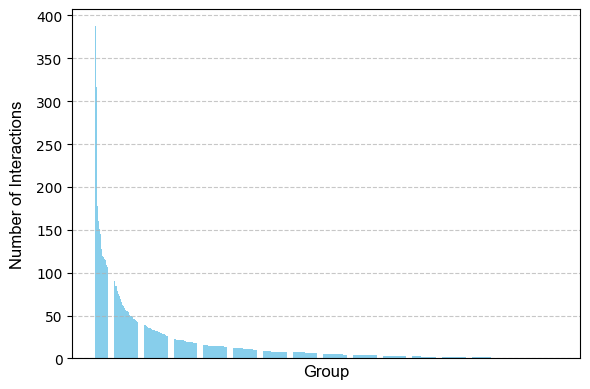

In [39]:
# 绘制柱状图

font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 12,
}

plt.figure(figsize=(6,4), dpi=100)
plt.bar(range(len(sorted_group_ids)), sorted_interactions, color='skyblue')
plt.xlabel('Group',font1)

plt.ylabel('Number of Interactions', font1, labelpad=8)  # 根据需要调整labelpad的值
# plt.title('Number of Interactions per User')
plt.xticks([])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('mooc_group_bar.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


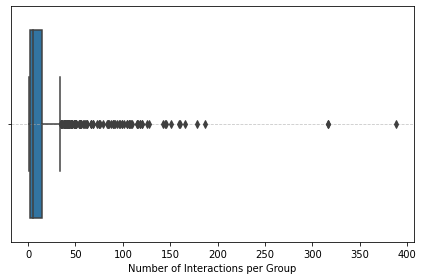

In [40]:
interactions_counts = group_interactions.values

# 绘制箱型图
plt.figure(figsize=(6, 4))
sns.boxplot(x=interactions_counts)
plt.xlabel('Number of Interactions per Group')
# plt.title('Distribution of Interactions per Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('mooc_group_box.eps', format='eps')
plt.show()

## The division of test set and training set

In [ ]:
unq_g_v = set()

for group,video in zip(group_video[0],group_video[1]):
    unq_g_v.add((group,video))
unq_g_v

In [30]:
# 平均每个组交互的数
# DATA3: 14161 / 937
# DATA1 13177 / 904
# DATA2 13149 / 910
# DATA4 15902/896
# DATA4 14816/908

In [31]:
# 抽取测试机，训练集
GroupTrain = './KA_DATA5/moocGroupTrain.csv'
GroupTest = './KA_DATA5/moocGroupTest.csv'

with open(GroupTrain,'w') as object:
    for i in g_v[0:int(len(g_v)*0.90)]:
        object.write(str(i[0])+" ")
        object.write(str(i[1])+"\n")
        
with open(GroupTest,'w') as object:
    for i in g_v[int(len(g_v)*0.90):]:
        object.write(str(i[0])+" ")
        object.write(str(i[1])+"\n")   

In [32]:
moocGroupTest = pd.read_csv("./KA_DATA5/moocGroupTest.csv", header = None, sep=" ")
user_video['video'].max()    # 1374
moocGroupTest[:5]

,0,1
0,1368,179
1,410,902
2,1236,485
3,144,948
4,1197,179


In [33]:
f = open('./KA_DATA5/moocGroupNegative.csv','w',encoding='utf-8')
for user,video in zip(moocGroupTest[0],moocGroupTest[1]):
    text_p = []
    text_p.append((user,video))
    for i in str(text_p[0]):
        if i != ' ':
            f.write(i)
    for i in range(99):
        f.write(' ')
        j = np.random.randint(0, user_video['video'].max() + 1)
        while (user,j) in unq_g_v: # or j in video_vain
            j = np.random.randint(0, user_video['video'].max() + 1)
        f.write(str(j))
    f.write('\n')
f.close()